In [83]:
#DECISION TREE:

import pandas as pd
dt=pd.read_csv("Y:\Diabetes.csv")
dt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

In [3]:
dt.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dt.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
dt.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
dt.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

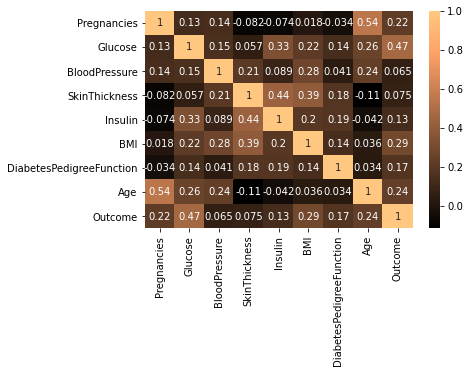

In [94]:
# color=twilight_shifted_r,copper_r,copper,gist_earth_r,gist_gray,gist_gray_r, gist_heat,gist_earth

corr=dt.corr()
sb.heatmap(corr,annot=True,cmap=("copper"))

In [32]:
x=dt[['Pregnancies','Glucose' ,'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
print(x)
y=dt['Outcome']
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=500)

In [104]:
model=DecisionTreeClassifier()
# Fit the model:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [105]:
#Predict test set:
y_pred=model.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7489177489177489


[Text(165.6275699013158, 211.04470588235293, 'X[1] <= 123.5\ngini = 0.454\nsamples = 537\nvalue = [350, 187]'),
 Text(50.10986842105263, 198.25411764705882, 'X[7] <= 28.5\ngini = 0.272\nsamples = 314\nvalue = [263, 51]'),
 Text(17.621052631578948, 185.4635294117647, 'X[0] <= 7.5\ngini = 0.096\nsamples = 178\nvalue = [169, 9]'),
 Text(13.215789473684211, 172.6729411764706, 'X[2] <= 95.0\ngini = 0.086\nsamples = 177\nvalue = [169, 8]'),
 Text(8.810526315789474, 159.88235294117646, 'X[5] <= 30.95\ngini = 0.076\nsamples = 176\nvalue = [169, 7]'),
 Text(4.405263157894737, 147.09176470588235, 'gini = 0.0\nsamples = 106\nvalue = [106, 0]'),
 Text(13.215789473684211, 147.09176470588235, 'X[5] <= 31.1\ngini = 0.18\nsamples = 70\nvalue = [63, 7]'),
 Text(8.810526315789474, 134.30117647058825, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(17.621052631578948, 134.30117647058825, 'X[2] <= 22.0\ngini = 0.159\nsamples = 69\nvalue = [63, 6]'),
 Text(13.215789473684211, 121.51058823529411, 'gini = 

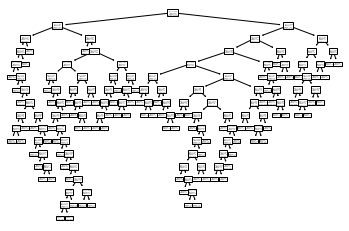

In [89]:
tree.plot_tree(model)


In [108]:
#fine tune the model:

nm=DecisionTreeClassifier(criterion='gini',max_depth=3)
nm.fit(x_train,y_train)
y_pred=nm.predict(x_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7316017316017316


[Text(167.4, 190.26, 'X[1] <= 123.5\ngini = 0.457\nsamples = 537\nvalue = [347, 190]'),
 Text(83.7, 135.9, 'X[7] <= 30.5\ngini = 0.292\nsamples = 315\nvalue = [259, 56]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 45.45\ngini = 0.139\nsamples = 200\nvalue = [185, 15]'),
 Text(20.925, 27.180000000000007, 'gini = 0.123\nsamples = 197\nvalue = [184, 13]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[5] <= 26.95\ngini = 0.459\nsamples = 115\nvalue = [74, 41]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.494\nsamples = 92\nvalue = [51, 41]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 155.5\ngini = 0.479\nsamples = 222\nvalue = [88, 134]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 27.35\ngini = 0.5\nsamples = 140\nvalue = [72, 68]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.26\nsamples = 26\nvalue = [

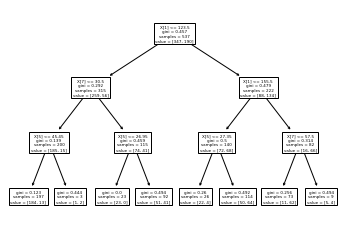

In [109]:
tree.plot_tree(nm)
